# Linear Regression
Linear regression is one of the simplest and most widely used algorithms in machine learning for predictive analysis.
In this Notebook we will build Linear Regression model from scratch using numpy library.

y=w⋅X+b

Where y is the output or prediction.

x is the input or feature.

w is the weight, analogous to the slope 𝑚

b is the bias term, analogous to the y-intercept 𝑏

In [34]:
import numpy as np # Importing numpy library

class LinearRegression:   # Define a class for Linear Regression
    def __init__(self, learning_rate=1.0e-2, epochs=1000): # Constructor with default hyperparameters
        self.learning_rate = learning_rate # Set learning rate
        self.epochs = epochs # Set number of epochs
        self.weights = None # Number of weights and biases are set to None because it's dependent on the data 
        self.bias = None
   
    # In the fit method, we are provided with data and their associated values. X is for input features and y for target values.
    # We can now use these, to initialize our weights, and then train the model to find optimal weights.
    def fit(self, X, y): # Loop runs for the specified number of epochs.
        num_samples, num_features = X.shape
        self.weights = np.random.rand(num_features) # We initialize the weights randomly based on the number of features in the input data X.
        self.bias = 0
        
        for i in range(self.epochs):
            y_predicted = np.dot(X, self.weights) + self.bias # We compute the predicted values using the dot product of input features (X) and weights, and then add the bias.
            # Calculate the gradients of the loss function with respect to the weights (dw) and bias (db) using the derivative of the mean squared error loss function.
            dw = (1 / num_samples) * np.dot(X.T, y_predicted - y)
            db = (1 / num_samples) * np.sum(y_predicted - y)
            # Update the weights and bias using gradient descent, where the learning rate (self.learning_rate) controls the step size in the update rule.
            self.weights = self.weights - self.learning_rate * dw
            self.bias = self.bias - self.learning_rate * db

        # Calculate and print the final MSE after training
        final_y_predicted = np.dot(X, self.weights) + self.bias
        final_mse = self.mean_squared_error(y, final_y_predicted) # Calculate the final MSE using the mean_squared_error method.
        print(f"MSE: {final_mse}") # Print the final MSE after training

    # Make predictions using the trained model. It takes input features X and returns the predicted target values.
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

    # Method to calculate Mean Squared Error (MSE) between true values and predicted values.
    def mean_squared_error(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)


In [35]:
if __name__ == "__main__":  
    # Generating random data for demonstration
    np.random.seed(0)  # For reproducibility
    X = 2 * np.random.rand(100, 1)  # Generate random input features
    y = 4 + 3 * X + np.random.randn(100, 1)  # Generate target values with some random noise

    # Creating an instance of the LinearRegression class
    model = LinearRegression()  # Create an object of the LinearRegression class

    # Training the model
    model.fit(X, y)  # Train the model using the input features (X) and target values (y)

    # Making predictions
    predictions = model.predict(X)  # Use the trained model to make predictions on the input features (X)

MSE: 0.9957221920872454


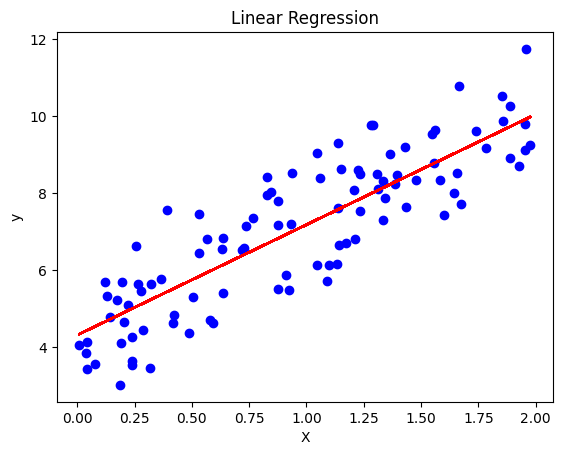

In [36]:
import matplotlib.pyplot as plt
plt.scatter(X, y, color='blue') 
plt.plot(X, predictions, color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.show()

### Scikit-learn 
Scikit-learn is a popular Python library used for machine learning tasks such as classification, regression, clustering, and dimensionality reduction. It provides a simple and efficient way to implement various machine learning algorithms and is built on top of other scientific computing libraries like NumPy, SciPy, and matplotlib. 

Mean Squared Error (from scikit-learn): 0.9924386487246479


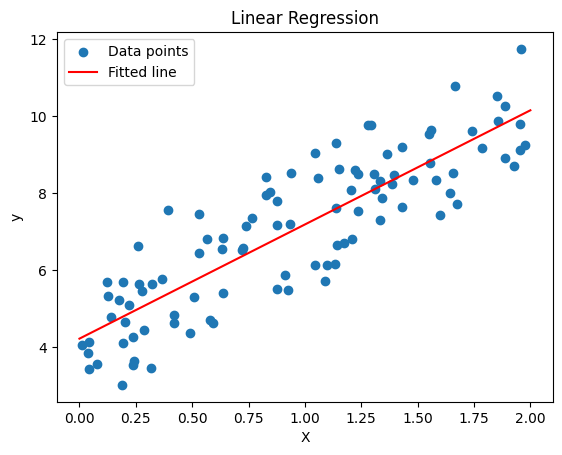

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

np.random.seed(0)  # For reproducibility
# Generate random input features
X = 2 * np.random.rand(100, 1)

# Generate target values with some random noise
y = 4 + 3 * X + np.random.randn(100, 1)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Make predictions
X_new = np.array([[0], [2]])
y_pred = model.predict(X_new)

# Predict target values for the input features used in fitting the model
y_train_pred = model.predict(X)

# Calculate Mean Squared Error
mse = mean_squared_error(y, y_train_pred)
print("Mean Squared Error (from scikit-learn):", mse)

# Plot the data and the fitted line
plt.scatter(X, y, label='Data points')
plt.plot(X_new, y_pred, color='red', label='Fitted line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')

plt.legend()
plt.show()
